## Plotting

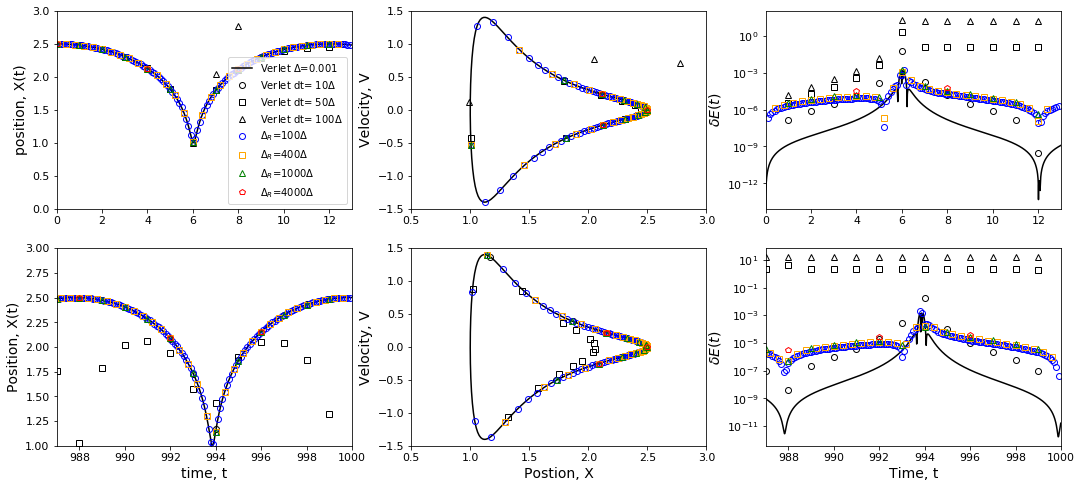

In [6]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#fig, ax1 = plt.subplots()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

#ax_insert = inset_axes(ax[2,1], height="100%", width="100%", loc='lower left', bbox_to_anchor=(0.5,0.05,0.47,0.47), bbox_transform=ax[2,1].transAxes)
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-',':', '--', '-.']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
markerstyles = ["o", "s", "^", "p"]
colors = ['blue', 'orange', 'green', 'red']


#################################################################
how_freq =100
delta_base = 0.001
time__ = 1000
x0_ = 2.5

params__ = (1.0, x0_, time__, delta_base)

time_limit=13
time_limit0=0

#detltaT = [0.01, 0.02, 0.05, 0.08,  0.1]
detltaT = [0.01, 0.05, 0.1]
i=0
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, x0_, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_/delta_base)
    how_freq_ = int(how_freq/factor_)
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)

    lgnd_text='$\Delta$'

    if i ==0:
        ax[0,0].plot(simulated_result_file[start:end:1,0], simulated_result_file[start:end:1,2], label='Verlet $\Delta$={}'.format(0.001),
            color='black',linestyle=linestyles[i])
    
    ax[0,0].plot(simulated_result_file[start:end:how_freq_,0], simulated_result_file[start:end:how_freq_,1], label='Verlet dt= {}{}'.format(int(deltaT_/0.001),lgnd_text),
            color='black',linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1


delta_T_choices= np.array([1, 4, 10, 40])
i=0
for key in delta_T_choices:
    delta_base=0.01
    deltaT_ = key*10*delta_base
    
    RNN_result = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    #error = RNN_result[:,1]-RNN_result[:,2]
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    lgnd_text='$\Delta$'
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 
    ax[0,0].plot(RNN_result[start:end,0],  RNN_result[start:end,1], label='$\Delta_R$='+ str(int(deltaT_/0.001)) +lgnd_text, color=colors[i],linestyle='none', 
                 marker= markerstyles[i], markerfacecolor='none')
    i += 1 

#ax[0,0].set_title("Postion")    
#ax[0,0].set_yscale('log')
ax[0,0].set_ylim(0, 3)
ax[0,0].set_xlim(time_limit0, time_limit)
#ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('position, X(t)', fontsize=14)
ax[0,0].legend(loc='lower right')
ax[0,0].tick_params(axis='both', which='major', labelsize=11)
ax[0,0].tick_params(axis='both', which='minor', labelsize=11)

#################################################################
#.........
i=0
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, x0_, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_/delta_base)
    how_freq_ = int(how_freq/factor_)

    lgnd_text='$\Delta$'
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)

    if i ==0:
        ax[0,1].plot(simulated_result_file[start:end:1,2], simulated_result_file[start:end:1,4], label='MD ΔT = {}{}'.format(0.001,lgnd_text),
            color='black',linestyle=linestyles[i])
    
    ax[0,1].plot(simulated_result_file[start:end:how_freq_,1], simulated_result_file[start:end:how_freq_,3], label='MD ΔT = {}{}'.format(deltaT_,lgnd_text),
            color='black',linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1


i=0
for key in delta_T_choices:
    delta_base=0.01
    deltaT_ = key*10*delta_base
    
    RNN_result = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    #error = RNN_result[:,1]-RNN_result[:,2]
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 

    ax[0,1].plot(RNN_result[start:end,1],  RNN_result[start:end,3], label='RNN ΔT ='+ str(deltaT_) +lgnd_text,
            color=colors[i],linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    i += 1 

#ax[0,1].set_title("Phase Diagram")    
#ax[0,1].set_yscale('log')
#ax[0,1].set_xscale('log')
#ax[0,1].set_ylim(10**-6, 10**0)
#ax[0,1].set_ylim(-1.5, 50)
ax[0,1].set_ylim(-1.5, 1.5)
ax[0,1].set_xlim(0.5, 3)
#ax[0,1].set_xlabel('Postion')
ax[0,1].set_ylabel('Velocity, V', fontsize=14)
#ax[1].legend()
ax[0,1].tick_params(axis='both', which='major', labelsize=11)
ax[0,1].tick_params(axis='both', which='minor', labelsize=11)


#################################################################
i=0
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, x0_, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_/delta_base)
    how_freq_ = int(how_freq/factor_)
    
    sigma = 1.0
    eps = 1.0
    
    lgnd_text=''
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    if i ==0:
        VV_pos = simulated_result_file[::,2]
        VV_vel = simulated_result_file[::,4]
        VV_E = 0.5 * 1.0 * np.square(VV_vel) + 4 * eps * ( ((sigma**12)/(VV_pos**12)) - ((sigma**6)/(VV_pos**6)) )
        VV_E= abs((VV_E-VV_E[0])/VV_E[0])  
        ax[0,2].plot(simulated_result_file[start:end:1,0], VV_E[start:end], label='MD ΔT = {}{}'.format(0.001,lgnd_text),
            color='black',linestyle=linestyles[i])
   
    VV_pos = simulated_result_file[::,1]
    VV_vel = simulated_result_file[::,3]
    VV_E = 0.5 * 1.0 * np.square(VV_vel) + 4 * eps * ( ((sigma**12)/(VV_pos**12)) - ((sigma**6)/(VV_pos**6)) )
    VV_E= abs((VV_E-VV_E[0])/VV_E[0]) 

    ax[0,2].plot(simulated_result_file[start:end:how_freq_,0], VV_E[start:end:how_freq_], label='MD ΔT = {}{}'.format(deltaT_,lgnd_text),
            color='black',linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1

i=0
for key in delta_T_choices:
    delta_base=0.01
    deltaT_ = key*10*delta_base
    
    RNN_result = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    #error = RNN_result[:,1]-RNN_result[:,2]
   
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 
    sigma = 1.0
    eps = 1.0
    RNN_pos = RNN_result[::,1]
    RNN_vel = RNN_result[::,3]
    RNN_E = 0.5 * 1.0 * np.square(RNN_vel) + 4 * eps * ( ((sigma**12)/(RNN_pos**12)) - ((sigma**6)/(RNN_pos**6)) )
    RNN_E= abs((RNN_E-RNN_E[0])/RNN_E[0]) 

    ax[0,2].plot(RNN_result[start:end,0],  RNN_E[start:end], label='RNN ΔT ='+ str(deltaT_) +lgnd_text,
             color=colors[i],linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1 



#ax[0,2].set_title("Energy")    
ax[0,2].set_yscale('log')
#ax[0,2].set_ylim(10**-6, 10**0)
ax[0,2].set_xlim(time_limit0, time_limit)
#ax[0,2].set_xlabel('Time')
ax[0,2].set_ylabel('$\delta E(t)$', fontsize=14)
#ax[0,2].legend()
ax[0,2].tick_params(axis='both', which='major', labelsize=11)
ax[0,2].tick_params(axis='both', which='minor', labelsize=11)


#################################################################
#ax_insert = inset_axes(ax[2,1], height="100%", width="100%", loc='lower left', bbox_to_anchor=(0.5,0.05,0.47,0.47), bbox_transform=ax[2,1].transAxes)
#linestyles = ['-', '--', '-', '--', '-', '--', '-', '--']
linestyles = ['-',':', '--', '-.']

#markerstyles = ["+", "x", "o", "v", "^", "<", ">", "1"]
markerstyles = ["o", "s", "^", "p"]
colors = ['blue', 'orange', 'green', 'red']


#################################################################
how_freq =100
delta_base = 0.001
time__ = 1000
params__ = (1.0, x0_, time__, delta_base)

time_limit=1000
time_limit0=987

#detltaT = [0.01, 0.02, 0.05, 0.08,  0.1]
detltaT = [0.01, 0.05, 0.1]
i=0
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, x0_, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_/delta_base)
    how_freq_ = int(how_freq/factor_)
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)

    lgnd_text=''

    if i ==0:
        ax[1,0].plot(simulated_result_file[start:end:1,0], simulated_result_file[start:end:1,2], label='MD ΔT = {}{}'.format(0.001,lgnd_text),
            color='black',linestyle=linestyles[i])
    
    ax[1,0].plot(simulated_result_file[start:end:how_freq_,0], simulated_result_file[start:end:how_freq_,1], label='MD ΔT = {}{}'.format(deltaT_,lgnd_text),
            color='black',linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1


delta_T_choices= np.array([1, 4, 10, 40])
i=0
for key in delta_T_choices:
    delta_base=0.01
    deltaT_ = key*10*delta_base
    
    RNN_result = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    #error = RNN_result[:,1]-RNN_result[:,2]
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 

    ax[1,0].plot(RNN_result[start:end,0],  RNN_result[start:end,1], label='RNN ΔT ='+ str(deltaT_) +lgnd_text,
            color=colors[i],linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    i += 1 

#ax[1,0].set_title("Postion")    
#ax[1,0].set_yscale('log')
ax[1,0].set_ylim(1, 3)
ax[1,0].set_xlim(time_limit0, time_limit)
ax[1,0].set_xlabel('time, t', fontsize=14)
ax[1,0].set_ylabel('Position, X(t)', fontsize=14)
ax[1,0].tick_params(axis='both', which='major', labelsize=11)
ax[1,0].tick_params(axis='both', which='minor', labelsize=11)
#ax[1,0].legend()

#################################################################

i=0
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, x0_, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_/delta_base)
    how_freq_ = int(how_freq/factor_)

    lgnd_text=''
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)

    if i ==0:
        ax[1,1].plot(simulated_result_file[start:end:1,2], simulated_result_file[start:end:1,4], label='MD ΔT = {}{}'.format(0.001,lgnd_text),
            color='black',linestyle=linestyles[i])
    
    ax[1,1].plot(simulated_result_file[start:end:how_freq_,1], simulated_result_file[start:end:how_freq_,3], label='MD ΔT = {}{}'.format(deltaT_,lgnd_text),
            color='black',linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1


i=0
for key in delta_T_choices:
    delta_base=0.01
    deltaT_ = key*10*delta_base
    
    RNN_result = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    #error = RNN_result[:,1]-RNN_result[:,2]
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 

    ax[1,1].plot(RNN_result[start:end,1],  RNN_result[start:end,3], label='RNN ΔT ='+ str(deltaT_) +lgnd_text,
            color=colors[i],linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    i += 1 

#ax[1,1].set_title("Phase Diagram")    
#ax[1,1].set_yscale('log')
#ax[1,1].set_xscale('log')
#ax[1,1].set_ylim(10**-6, 10**0)
ax[1,1].set_xlim(0.5, 3)
ax[1,1].set_ylim(-1.5, 1.5)
ax[1,1].set_xlabel('Postion, X', fontsize=14)
ax[1,1].set_ylabel('Velocity, V', fontsize=14)
ax[1,1].tick_params(axis='both', which='major', labelsize=11)
ax[1,1].tick_params(axis='both', which='minor', labelsize=11)
#ax[1,1].legend()

#################################################################
i=0
for deltaT_ in detltaT:
    delta_base=0.01
    params__ = (1.0, x0_, time__, deltaT_)
    
    simulated_result_file = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_deltaT={}.dat'.format(*params__))
     
    factor_ = int(deltaT_/delta_base)
    how_freq_ = int(how_freq/factor_)
    
    sigma = 1.0
    eps = 1.0
    
    lgnd_text=''
    
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    if i ==0:
        VV_pos = simulated_result_file[::,2]
        VV_vel = simulated_result_file[::,4]
        VV_E = 0.5 * 1.0 * np.square(VV_vel) + 4 * eps * ( ((sigma**12)/(VV_pos**12)) - ((sigma**6)/(VV_pos**6)) )
        VV_E= abs((VV_E-VV_E[0])/VV_E[0])  
        ax[1,2].plot(simulated_result_file[start:end:1,0], VV_E[start:end], label='MD ΔT = {}{}'.format(0.001,lgnd_text),
            color='black',linestyle=linestyles[i])
   
    VV_pos = simulated_result_file[::,1]
    VV_vel = simulated_result_file[::,3]
    VV_E = 0.5 * 1.0 * np.square(VV_vel) + 4 * eps * ( ((sigma**12)/(VV_pos**12)) - ((sigma**6)/(VV_pos**6)) )
    VV_E= abs((VV_E-VV_E[0])/VV_E[0]) 

    ax[1,2].plot(simulated_result_file[start:end:how_freq_,0], VV_E[start:end:how_freq_], label='MD ΔT = {}{}'.format(deltaT_,lgnd_text),
            color='black',linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1

i=0
for key in delta_T_choices:
    delta_base=0.01
    deltaT_ = key*10*delta_base
    
    RNN_result = np.loadtxt('lj_plot_data_phase/plotdata_LJ-1_mass={}_x0={}_t={}_RNNdeltaT={}.dat'.format(params__[0], params__[1], params__[2], deltaT_))
    
    #error = RNN_result[:,1]-RNN_result[:,2]
   
    start=int(time_limit0/deltaT_)
    end=int(time_limit/deltaT_)
    
    lgnd_text=''
    #lgnd_text = ' , MSE=' + "{:.2e}".format(np.average(error**2)) 
    sigma = 1.0
    eps = 1.0
    RNN_pos = RNN_result[::,1]
    RNN_vel = RNN_result[::,3]
    RNN_E = 0.5 * 1.0 * np.square(RNN_vel) + 4 * eps * ( ((sigma**12)/(RNN_pos**12)) - ((sigma**6)/(RNN_pos**6)) )
    RNN_E= abs((RNN_E-RNN_E[0])/RNN_E[0]) 

    ax[1,2].plot(RNN_result[start:end,0],  RNN_E[start:end], label='RNN ΔT ='+ str(deltaT_) +lgnd_text,
             color=colors[i],linestyle='none', marker= markerstyles[i], markerfacecolor='none')
    
    i += 1 



#ax[1,2].set_title("Energy")    
ax[1,2].set_yscale('log')
#ax[1,2].set_ylim(10**-6, 10**0)
ax[1,2].set_xlim(time_limit0, time_limit)
ax[1,2].set_xlabel('Time, t', fontsize=14)
ax[1,2].set_ylabel('$\delta E(t)$', fontsize=14)
ax[1,2].tick_params(axis='both', which='major', labelsize=11)
ax[1,2].tick_params(axis='both', which='minor', labelsize=11)
#ax[1,2].legend()


plt.show()